# VÕ MINH NGỌC - Bài kiểm tra cuối môn: LDS3
### Cho dữ liệu housing-prices-dataset/train.csv
### Yêu cầu: Thực hiện các công việc sau
1. Xác định các thuộc tính
2. Phân tích đơn biến  
   Để dự đoán giá nhà, giả sử cần các thông tin sau: 'LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 
   'TotRmsAbvGrd' => phân tích các biến này
3. Phân tích hai biến
4. Xử lý dữ liệu thiếu
5. Phát hiện và xử lý ngoại lệ

In [800]:
# link: https://www.kaggle.com/alphaepsilon/housing-prices-dataset

In [801]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [802]:
df = pd.read_csv("housing-prices-dataset/train.csv")
df.shape

(1460, 81)

In [803]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [804]:
DIVIDER = '-'*50

In [805]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 1. Xác định các thuộc tính
1. Input: Tất cả ngoại trừ SalePrice
2. Output: SalePrice
3. Type of variable: <br/>
    3.1 Predictor: khác SalePrice <br/>
    3.2 Target: SalePrice <br/>
4. Data Type: <br/>
    4.1 Charactor/String <br/>
    4.2 Numeric <br/>
5. Variable Category:<br/>
    5.1 Categorical: kieu so, kieu chuoi  <br/>
    5.2 Continuous: int, float

In [806]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [807]:
#Tạo danh sách các cột kiểu số 
numbers = [f for f in df.columns if df.dtypes[f] != 'object'] # Quantitative: # du lieu kieu so
list_nums = ', '.join(numbers)
list_nums

'Id, MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SalePrice'

In [808]:
# Tạo danh sách cột kiểu chuỗi
objects = [f for f in df.columns if df.dtypes[f] == 'object'] # Qualitative : # du lieu kieu chuoi
list_obj = ', '.join(objects)
list_obj

'MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence, MiscFeature, SaleType, SaleCondition'

In [809]:
# Categorical: 
# Duyệt qua các biến chuỗi, in ra các giá trị có trong mỗi biến -->  xem xet cac bien phan loai kieu chuoi
# Với kết quả in ra, xác định các biến kiểu số thuộc loại Categorical 
i = 1
for obj in objects:
    print(i, "/", obj, "\t",len(df[obj].unique()),":", df[obj].unique())
    i = i+1

1 / MSZoning 	 5 : ['RL' 'RM' 'C (all)' 'FV' 'RH']
2 / Street 	 2 : ['Pave' 'Grvl']
3 / Alley 	 3 : [nan 'Grvl' 'Pave']
4 / LotShape 	 4 : ['Reg' 'IR1' 'IR2' 'IR3']
5 / LandContour 	 4 : ['Lvl' 'Bnk' 'Low' 'HLS']
6 / Utilities 	 2 : ['AllPub' 'NoSeWa']
7 / LotConfig 	 5 : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
8 / LandSlope 	 3 : ['Gtl' 'Mod' 'Sev']
9 / Neighborhood 	 25 : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
10 / Condition1 	 9 : ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
11 / Condition2 	 8 : ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
12 / BldgType 	 5 : ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
13 / HouseStyle 	 8 : ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
14 / RoofStyle 	 6 : ['Gable' 'Hip' 'Gambrel

In [810]:
# Duyệt qua các biến kiểu số in ra các giá trị phân biệt có trong cột (chỉ in các giá trị khi số giá trị phân biệt nhỏ hơn 120)
# Với kết quả in ra, xác định các biến kiểu số thuộc loại Categorical 
i = 1
for obj in numbers:
    print(i, "/", obj, "\t",len(df[obj].unique()),":", df[obj].unique() if len(df[obj].unique())<120 else '')
    i = i+1

1 / Id 	 1460 : 
2 / MSSubClass 	 15 : [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
3 / LotFrontage 	 111 : [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
4 / LotArea 	 1073 : 
5 / OverallQual 	 10 : [ 7  6  8  5  9  4 10  3  1  2]
6 / OverallCond 	 9 : [5 8 6 7 4 2 3 9 1]
7 / YearBuilt 	 112 : [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 19

In [811]:
#- Quan sát 2 kết quả trên để kết luận, xác định tập features. Trong phần tiếp theo giả sử chúng ta chỉ làm việc với các 
# features = 'LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd'   

## 2. Phân tích đơn biến

In [812]:
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']

### 2.1. Với mỗi biến continuous. Hãy thực hiện các yêu cầu sau: 
- Vẽ đồ thị gồm 2 phần: histogram và boxplot của biến.
- Tìm mean, mode, độ nghiêng, độ nhọn  --> Nhận xét có phân phối chuẩn không.
- Nếu không phải phân phối chuẩn: xác định Q1, Q3, IQR, Oulier Upper, Outlier Lower
  Nếu là phân phối chuẩn: xác định Oulier Upper, Outlier Lower theo Z-score
- Xác định tập dữ  outlier trên và dưới. 
- Kiểm tra nếu tổng số các outlier nhỏ hơn 5% số phần tử tổng thể thì -->  xóa các outlier này khỏi tập dữ liệu. 
#### Danh sách các biến Continuous cần thực hiện
- LotArea
- 1stFlrSF
- 2ndFlrSF

In [813]:
features_data = df[['LotArea', '1stFlrSF', '2ndFlrSF']]
features_data.head()

,LotArea,1stFlrSF,2ndFlrSF
0,8450,856,854
1,9600,1262,0
2,11250,920,866
3,9550,961,756
4,14260,1145,1053


In [814]:
features_data.size

4380

In [815]:
features_data.describe()

,LotArea,1stFlrSF,2ndFlrSF
count,1460.000000,1460.000000,1460.000000
mean,10516.828082,1162.626712,346.992466
std,9981.264932,386.587738,436.528436
min,1300.000000,334.000000,0.000000
25%,7553.500000,882.000000,0.000000
50%,9478.500000,1087.000000,0.000000
75%,11601.500000,1391.250000,728.000000
max,215245.000000,4692.000000,2065.000000


In [816]:
from scipy import stats

# Draw chart func
def get_chart(data):
    plt.figure(figsize=(20,5))
    plt.subplot(1, 2, 1)
    plt.hist(data)
    plt.subplot(1, 2, 2)
#     plt.boxplot(data)
    sns.boxplot(data)
    plt.show()

# Get data mean, median, mode, kurtosis, skew func
def get_info(data):
    mean = data.mean()
    median = data.median()
    mode = stats.mode(data)
    skew = stats.skew(data)
    kurtosis = stats.kurtosis(data)
    print('Median: ', median)
    print('Mean: ', mean)
    print('Mode: ', mode)
    print('Skew: ', skew)
    print('Kurtosis: ', kurtosis)
    print(DIVIDER)

# Find outliers for normal distribution func
def get_outliers_normal_dist(data):
    data_zscores = stats.zscore(data)
    upper_outliers = data_zscores[[n >= 2.5 for n in data_zscores]]
    lower_outliers = data_zscores[[n <= -2.5 for n in data_zscores]]
    upper_indexes = [data_zscores.tolist().index(i) for i in upper_outliers]
    lower_indexes = [data_zscores.tolist().index(i) for i in lower_outliers]
    print("Upper outliers: ", data[upper_indexes])
    print("Lower outliers: ", data[lower_indexes])
    five_percent = 0.05 * data.size
    if (upper_outliers.size + lower_outliers.size) < five_percent:
        drop_indexes = [*upper_indexes, *lower_indexes]
        data.drop(drop_indexes, inplace=True)
        print('After size: ', data.size)
    sns.boxplot(data)
    
# Find outliers for non-normal-distribution func
def get_outliers_non_normal_dist(data):
    original_size = data.size
    percentiles = np.array([25, 75])
    Q1, Q3 = np.percentile(data, percentiles)
    IQR = Q3 - Q1
    upper = Q3 + (1.5 * IQR)
    lower = Q1 - (1.5 * IQR)
    print (f'Q1, Q3, IQR: {Q1}, {Q3}, {IQR}')
    upper_outliers = data.loc[lambda x: x > upper]
    print(DIVIDER)
    lower_outliers = data.loc[lambda x: x < lower]
    print('Upper outliers: ', upper_outliers)
    print(DIVIDER)
    print('Lower outliers: ', lower_outliers)
    print(DIVIDER)
    five_percent = 0.05 * data.size
    if (upper_outliers.size + lower_outliers.size) < five_percent:
        print('Number of outliers exceeds 5% of total data, lets drop them!.')
        drop_indexes = [*upper_outliers.index, *lower_outliers.index]
        data.drop(drop_indexes, inplace=True)
        print(f'Original data size: {original_size}. After drop outliers data size: {data.size}')
    sns.boxplot(data)
    
    

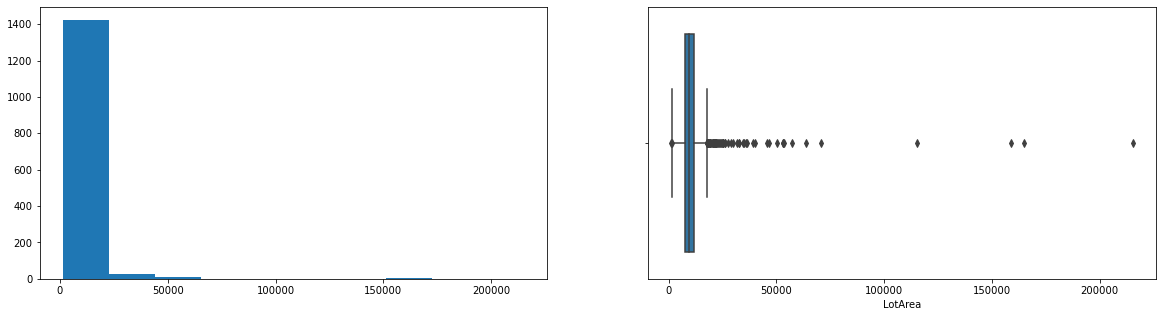

Median:  9478.5
Mean:  10516.828082191782
Mode:  ModeResult(mode=array([7200]), count=array([25]))
Skew:  12.195142125084478
Kurtosis:  202.5437927513529
--------------------------------------------------
Q1, Q3, IQR: 7553.5, 11601.5, 4048.0
--------------------------------------------------
Upper outliers:  53      50271
66      19900
113     21000
120     21453
159     19378
        ...  
1396    57200
1409    20544
1423    19690
1430    21930
1446    26142
Name: LotArea, Length: 67, dtype: int64
--------------------------------------------------
Lower outliers:  956     1300
1039    1477
Name: LotArea, dtype: int64
--------------------------------------------------
Number of outliers exceeds 5% of total data, lets drop them!.
Original data size: 1460. After drop outliers data size: 1391


/home/code/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:3939: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(obj)


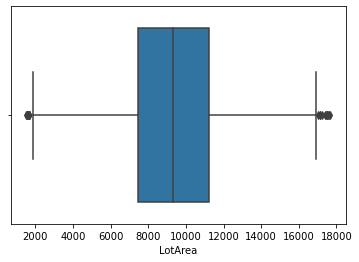

In [817]:
# LotArea
# Vẽ đồ thị gồm 2 phần: histogram và boxplot của biến.
# Tìm mean, mode, độ nghiêng, độ nhọn --> Nhận xét có phân phối chuẩn không.
# Nếu không phải phân phối chuẩn: xác định Q1, Q3, IQR, Oulier Upper, Outlier Lower Nếu là phân phối chuẩn: xác định Oulier Upper, Outlier Lower theo Z-score
# Xác định tập dữ outlier trên và dưới.
# Kiểm tra nếu tổng số các outlier nhỏ hơn 5% số phần tử tổng thể thì --> xóa các outlier này khỏi tập dữ liệu
lot_area_arr = features_data['LotArea']
get_chart(lot_area_arr)
get_info(lot_area_arr)
get_outliers_non_normal_dist(lot_area_arr)

#### Nhận xét: 
- Dựa vào biểu đồ histogram.
- Skew > 0.
- Kurtosis > 0.
- Vì là đơn biến, Median != Mean, Kurtosis khác Kurtosis và không gần bằng 0.
##### => Có thể kết luận dữ liệu 'LotArea' không phải là một phân phối chuẩn.

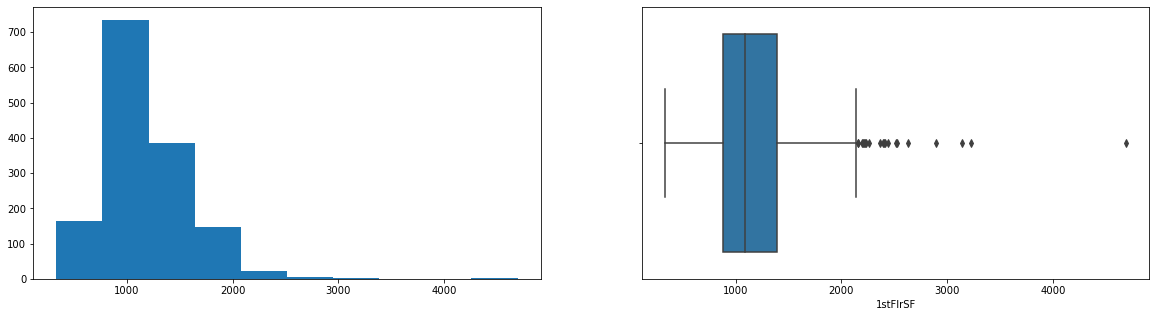

Median:  1087.0
Mean:  1162.626712328767
Mode:  ModeResult(mode=array([864]), count=array([25]))
Skew:  1.3753417421837937
Kurtosis:  5.722076026587489
--------------------------------------------------
Q1, Q3, IQR: 882.0, 1391.25, 509.25
--------------------------------------------------
Upper outliers:  66      2207
70      2223
113     2259
175     2158
178     2234
224     2392
440     2402
496     3228
523     3138
529     2515
691     2444
888     2217
898     2364
1024    2898
1044    2524
1182    2411
1205    2196
1298    4692
1346    2156
1373    2633
Name: 1stFlrSF, dtype: int64
--------------------------------------------------
Lower outliers:  Series([], Name: 1stFlrSF, dtype: int64)
--------------------------------------------------
Number of outliers exceeds 5% of total data, lets drop them!.
Original data size: 1460. After drop outliers data size: 1440


/home/code/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:3939: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(obj)


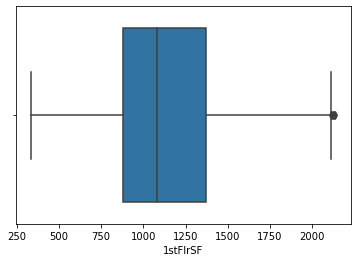

In [818]:
# 1stFlrSF
# Vẽ đồ thị gồm 2 phần: histogram và boxplot của biến.
# Tìm mean, mode, độ nghiêng, độ nhọn --> Nhận xét có phân phối chuẩn không.
# Nếu không phải phân phối chuẩn: xác định Q1, Q3, IQR, Oulier Upper, Outlier Lower Nếu là phân phối chuẩn: xác định Oulier Upper, Outlier Lower theo Z-score
# Xác định tập dữ outlier trên và dưới.
# Kiểm tra nếu tổng số các outlier nhỏ hơn 5% số phần tử tổng thể thì --> xóa các outlier này khỏi tập dữ liệu
firstFlrSF_arr = features_data['1stFlrSF']
get_chart(firstFlrSF_arr)
get_info(firstFlrSF_arr)
get_outliers_non_normal_dist(firstFlrSF_arr)

#### Nhận xét: 
- Dựa vào biểu đồ histogram.
- Skew > 0.
- Kurtosis > 0.
- Vì là đơn biến, Median != Mean, Kurtosis khác Kurtosis và không gần bằng 0.
##### => Có thể kết luận dữ liệu '1stFlrSF' không phải là một phân phối chuẩn.

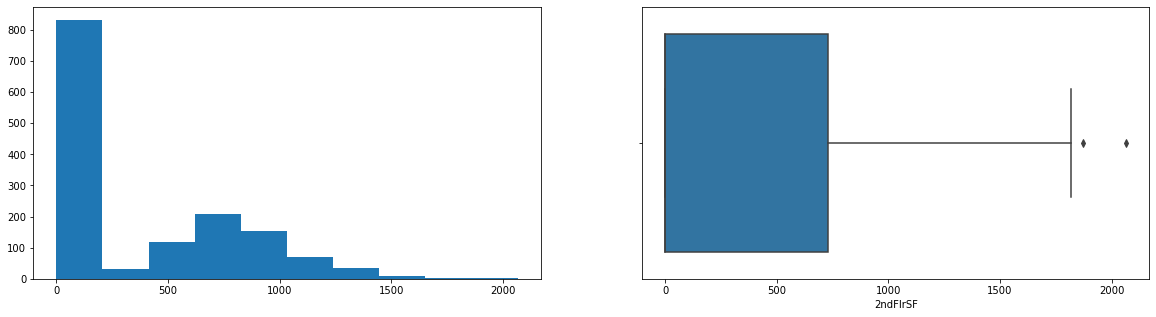

Median:  0.0
Mean:  346.99246575342465
Mode:  ModeResult(mode=array([0]), count=array([829]))
Skew:  0.8121942731961613
Kurtosis:  -0.5556767272864769
--------------------------------------------------
Q1, Q3, IQR: 0.0, 728.0, 728.0
--------------------------------------------------
Upper outliers:  691     1872
1182    2065
Name: 2ndFlrSF, dtype: int64
--------------------------------------------------
Lower outliers:  Series([], Name: 2ndFlrSF, dtype: int64)
--------------------------------------------------
Number of outliers exceeds 5% of total data, lets drop them!.
Original data size: 1460. After drop outliers data size: 1458


/home/code/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:3939: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(obj)


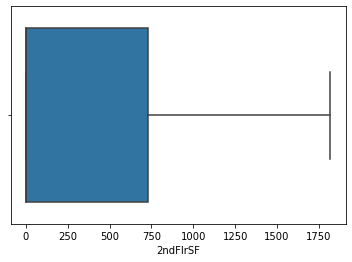

In [819]:
# 2ndFlrSF
# Vẽ đồ thị gồm 2 phần: histogram và boxplot của biến.
# Tìm mean, mode, độ nghiêng, độ nhọn --> Nhận xét có phân phối chuẩn không.
# Nếu không phải phân phối chuẩn: xác định Q1, Q3, IQR, Oulier Upper, Outlier Lower Nếu là phân phối chuẩn: xác định Oulier Upper, Outlier Lower theo Z-score
# Xác định tập dữ outlier trên và dưới.
# Kiểm tra nếu tổng số các outlier nhỏ hơn 5% số phần tử tổng thể thì --> xóa các outlier này khỏi tập dữ liệu
secondFlrSF = features_data['2ndFlrSF']
get_chart(secondFlrSF)
get_info(secondFlrSF)
get_outliers_non_normal_dist(secondFlrSF)

#### Nhận xét: 
- Dựa vào biểu đồ histogram.
- Skew > 0.
- Kurtosis > 0.
- Vì là đơn biến, Median != Mean, Kurtosis khác Kurtosis và không gần bằng 0.
##### => Có thể kết luận dữ liệu '2ndFlrSF' không phải là một phân phối chuẩn.

### 2.2. Với mỗi biến categorical hãy thực hiện các yêu cầu sau:
- Sử dụng groupby, count để đếm số các giá trị phân biệt có trong biến
- Vẽ đồ thị dạng bar plot với các dữ liệu nhận được. Nhận xét. 

#### Categorical Variables
- FullBath
- BedroomAbvGr
- TotRmsAbvGrd

In [820]:
categorical_features = ['FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
df_categoricals = df[categorical_features]
df_categoricals.head()

,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,2,3,8
1,2,3,6
2,2,3,6
3,1,3,7
4,2,4,9


In [821]:
df_categoricals.size

4380

In [822]:
df_categoricals.describe()

,FullBath,BedroomAbvGr,TotRmsAbvGrd
count,1460.000000,1460.000000,1460.000000
mean,1.565068,2.866438,6.517808
std,0.550916,0.815778,1.625393
min,0.000000,0.000000,2.000000
25%,1.000000,2.000000,5.000000
50%,2.000000,3.000000,6.000000
75%,2.000000,3.000000,7.000000
max,3.000000,8.000000,14.000000


In [823]:
df_categoricals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   FullBath      1460 non-null   int64
 1   BedroomAbvGr  1460 non-null   int64
 2   TotRmsAbvGrd  1460 non-null   int64
dtypes: int64(3)
memory usage: 34.3 KB


In [824]:
def categorical_data_info(column_name):
    distinct_values = df_categoricals.groupby(column_name)[column_name].value_counts()
    print(distinct_values)
    print(DIVIDER)
    print('Number of distinct values in data: ', distinct_values.count())
    print(DIVIDER)
    plt.figure(figsize=(10,8))
    sns.barplot(x=column_name, y=df_categoricals.index, data=df_categoricals)
    plt.show()
    

FullBath  FullBath
0         0             9
1         1           650
2         2           768
3         3            33
Name: FullBath, dtype: int64
--------------------------------------------------
Number of distinct values in data:  4
--------------------------------------------------


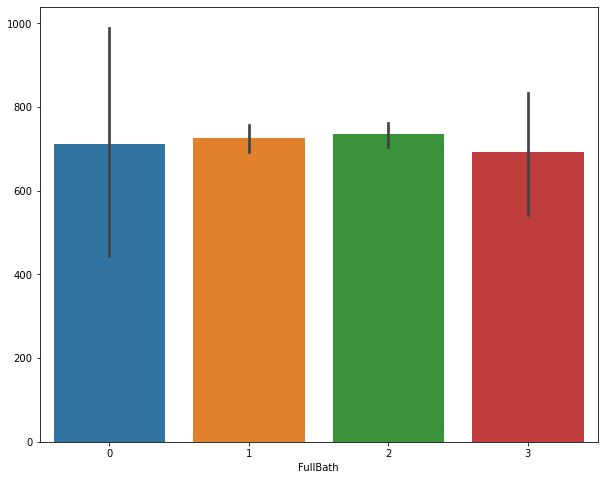

In [825]:
# FullBath
# Sử dụng groupby, count để đếm số các giá trị phân biệt có trong biến
# Vẽ đồ thị dạng bar plot với các dữ liệu nhận được. Nhận xét.
categorical_data_info('FullBath')

BedroomAbvGr  BedroomAbvGr
0             0                 6
1             1                50
2             2               358
3             3               804
4             4               213
5             5                21
6             6                 7
8             8                 1
Name: BedroomAbvGr, dtype: int64
--------------------------------------------------
Number of distinct values in data:  8
--------------------------------------------------


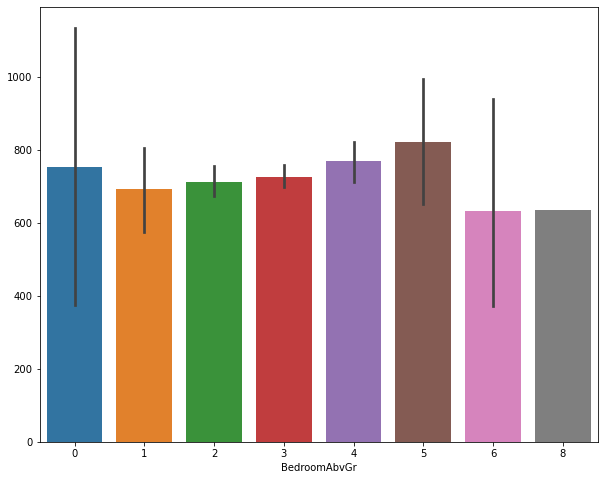

In [826]:
# BedroomAbvGr
# Sử dụng groupby, count để đếm số các giá trị phân biệt có trong biến
# Vẽ đồ thị dạng bar plot với các dữ liệu nhận được. Nhận xét.
categorical_data_info('BedroomAbvGr')

TotRmsAbvGrd  TotRmsAbvGrd
2             2                 1
3             3                17
4             4                97
5             5               275
6             6               402
7             7               329
8             8               187
9             9                75
10            10               47
11            11               18
12            12               11
14            14                1
Name: TotRmsAbvGrd, dtype: int64
--------------------------------------------------
Number of distinct values in data:  12
--------------------------------------------------


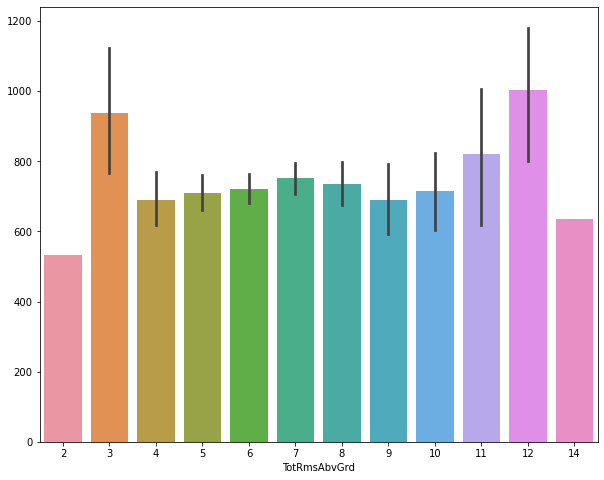

In [827]:
# TotRmsAbvGrd
# Sử dụng groupby, count để đếm số các giá trị phân biệt có trong biến
# Vẽ đồ thị dạng bar plot với các dữ liệu nhận được. Nhận xét.
categorical_data_info('TotRmsAbvGrd')

## 3. Phân tích hai biến
### Continuous & Continous
- Sử dụng pairplot để vẽ dữ liệu có trong 3 biến ['LotArea', '1stFlrSF', '2ndFlrSF]
- Sử dụng hàm corr để tính độ tương quan của 3 biến này.
- Nhận xét mối liên hệ giữa các biến

In [828]:
continuous_features = ['LotArea', '1stFlrSF', '2ndFlrSF']
df_continuous = df[continuous_features]
df_continuous.head()

,LotArea,1stFlrSF,2ndFlrSF
0,8450,856,854
1,9600,1262,0
2,11250,920,866
3,9550,961,756
4,14260,1145,1053


<Figure size 1440x576 with 0 Axes>

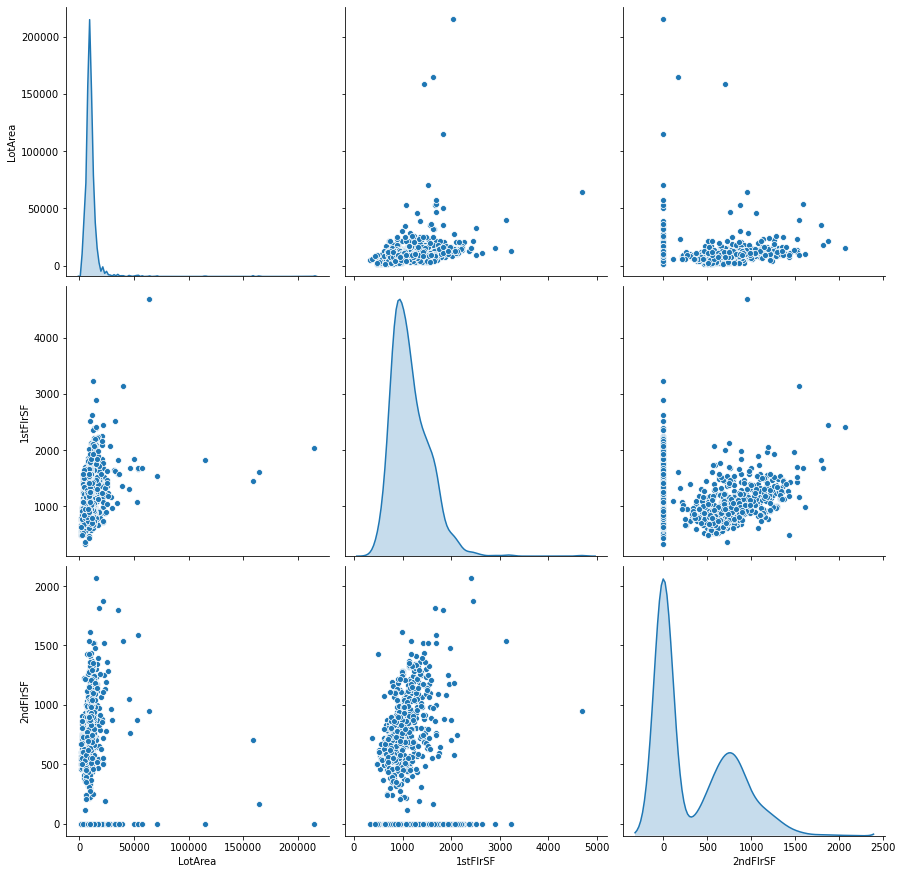

In [829]:
# Sử dụng pairplot để vẽ dữ liệu có trong 3 biến ['LotArea', '1stFlrSF', '2ndFlrSF]
plt.figure(figsize=(20,8))
sns.pairplot(df_continuous, vars=continuous_features, height=4, diag_kind='kde')
plt.show()

In [830]:
# Sử dụng hàm corr để tính độ tương quan của 3 biến này.
df[continuous_features].corr()

,LotArea,1stFlrSF,2ndFlrSF
LotArea,1.000000,0.299475,0.050986
1stFlrSF,0.299475,1.000000,-0.202646
2ndFlrSF,0.050986,-0.202646,1.000000


#### Nhận xét sự tương quan:
- Dữ liệu 'LotArea' và '1stFlrSF' có giá trị tương quan là 0.299475 => Tương quan thuận, mức độ tương quan vừa.
- Dữ liệu 'LotArea' và '2ndFlrSF' có giá trị tương quan là 0.050986 => Tương quan thuận, mức độ tương quan khá mạnh.
- Dữ liệu '1stFlrSF' và '2ndFlrSF' có giá trị tương quan là -0.202646 => Tương quan nghịch, mức độ tương quan vừa.

### Categorical & Categorical
- 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd'
- Dùng Chi-square test để kiểm tra độ tương qua giữa các cặp biến: FullBath' và 'BedroomAbvGr', ...  .

In [831]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

categorical_features = ['FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
df_categorical = df[categorical_features]
df_categorical.head()

,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,2,3,8
1,2,3,6
2,2,3,6
3,1,3,7
4,2,4,9


In [832]:
def chisquared_test(data, column_1, column_2):
    print(DIVIDER)
    print(f'Giả thuyết H0: {column_1} và {column_2} là 2 biến độc lập.')
    print(f'Giả thuyết Ha: {column_1} và {column_2} không phải là 2 biến độc lập.')
    table = pd.crosstab(data[column_1], data[column_2])
    print('Table: ', table)
    table.plot.bar()
    plt.show()
    print(DIVIDER)
    stat, p, dof, expected = chi2_contingency(table)
    print('dof=%d' % dof)
    print(expected)
    print(DIVIDER)
    # interpret test-statistic
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
    # interpret p-value
    alpha = 1.0 - prob
    print('significance=%.3f, p=%.3f' % (alpha, p))
    if p <= alpha:
        print('Phụ thuộc (từ chối giả thuyết H0).')
    else:
        print('Độc lập (chấp nhận giả thuyết H0).')

    if abs(stat) >= critical:
        print('Phụ thuộc (từ chối giả thuyết H0).')
        print(f'Kết luận: {column_1} và {column_2} không phải là 2 biến độc lập.')
    else:
        print('Độc lập (chấp nhận giả thuyết H0).')
        print(f'Kết luận: {column_1} và {column_2} là 2 biến độc lập.')
    

--------------------------------------------------
Giả thuyết H0: FullBath và BedroomAbvGr là 2 biến độc lập.
Giả thuyết Ha: FullBath và BedroomAbvGr không phải là 2 biến độc lập.
Table:  BedroomAbvGr  0   1    2    3    4   5  6  8
FullBath                                    
0             5   2    2    0    0   0  0  0
1             1  42  213  352   37   5  0  0
2             0   6  143  443  156  12  7  1
3             0   0    0    9   20   4  0  0


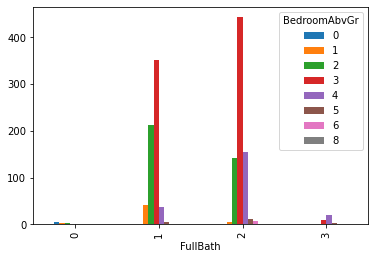

--------------------------------------------------
dof=21
[[3.69863014e-02 3.08219178e-01 2.20684932e+00 4.95616438e+00
  1.31301370e+00 1.29452055e-01 4.31506849e-02 6.16438356e-03]
 [2.67123288e+00 2.22602740e+01 1.59383562e+02 3.57945205e+02
  9.48287671e+01 9.34931507e+00 3.11643836e+00 4.45205479e-01]
 [3.15616438e+00 2.63013699e+01 1.88317808e+02 4.22926027e+02
  1.12043836e+02 1.10465753e+01 3.68219178e+00 5.26027397e-01]
 [1.35616438e-01 1.13013699e+00 8.09178082e+00 1.81726027e+01
  4.81438356e+00 4.74657534e-01 1.58219178e-01 2.26027397e-02]]
--------------------------------------------------
probability=0.950, critical=32.671, stat=898.930
significance=0.050, p=0.000
Phụ thuộc (từ chối giả thuyết H0).
Phụ thuộc (từ chối giả thuyết H0).
Kết luận: FullBath và BedroomAbvGr không phải là 2 biến độc lập.


In [833]:
# Ho: Biến FullBath và BedroomAbvGr là 2 biến độc lập.
# H1: Biến FullBath và BedroomAbvGr không phải là 2 biến độc lập.
chisquared_test(df, 'FullBath', 'BedroomAbvGr')

--------------------------------------------------
Giả thuyết H0: FullBath và TotRmsAbvGrd là 2 biến độc lập.
Giả thuyết Ha: FullBath và TotRmsAbvGrd không phải là 2 biến độc lập.
Table:  TotRmsAbvGrd  2   3   4    5    6    7    8   9   10  11  12  14
FullBath                                                        
0              0   1   4    1    2    1    0   0   0   0   0   0
1              1  16  79  210  226   80   29   8   1   0   0   0
2              0   0  14   63  174  245  154  61  39  10   7   1
3              0   0   0    1    0    3    4   6   7   8   4   0


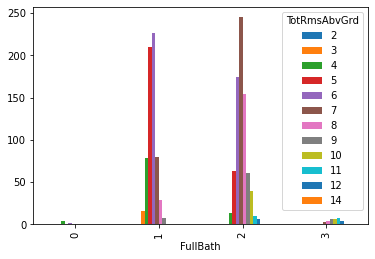

--------------------------------------------------
dof=33
[[6.16438356e-03 1.04794521e-01 5.97945205e-01 1.69520548e+00
  2.47808219e+00 2.02808219e+00 1.15273973e+00 4.62328767e-01
  2.89726027e-01 1.10958904e-01 6.78082192e-02 6.16438356e-03]
 [4.45205479e-01 7.56849315e+00 4.31849315e+01 1.22431507e+02
  1.78972603e+02 1.46472603e+02 8.32534247e+01 3.33904110e+01
  2.09246575e+01 8.01369863e+00 4.89726027e+00 4.45205479e-01]
 [5.26027397e-01 8.94246575e+00 5.10246575e+01 1.44657534e+02
  2.11463014e+02 1.73063014e+02 9.83671233e+01 3.94520548e+01
  2.47232877e+01 9.46849315e+00 5.78630137e+00 5.26027397e-01]
 [2.26027397e-02 3.84246575e-01 2.19246575e+00 6.21575342e+00
  9.08630137e+00 7.43630137e+00 4.22671233e+00 1.69520548e+00
  1.06232877e+00 4.06849315e-01 2.48630137e-01 2.26027397e-02]]
--------------------------------------------------
probability=0.950, critical=47.400, stat=694.267
significance=0.050, p=0.000
Phụ thuộc (từ chối giả thuyết H0).
Phụ thuộc (từ chối giả thuyết 

In [834]:
# Ho: Biến FullBath và TotRmsAbvGrd là 2 biến độc lập.
# H1: Biến FullBath và TotRmsAbvGrd không phải là 2 biến độc lập.
chisquared_test(df, 'FullBath', 'TotRmsAbvGrd')

--------------------------------------------------
Giả thuyết H0: BedroomAbvGr và TotRmsAbvGrd là 2 biến độc lập.
Giả thuyết Ha: BedroomAbvGr và TotRmsAbvGrd không phải là 2 biến độc lập.
Table:  TotRmsAbvGrd  2   3   4    5    6    7   8   9   10  11  12  14
BedroomAbvGr                                                   
0              0   1   2    2    1    0   0   0   0   0   0   0
1              1  14  18    5    5    4   2   1   0   0   0   0
2              0   2  73  145   99   30   5   0   2   2   0   0
3              0   0   3  122  289  252  97  26  10   3   2   0
4              0   0   1    1    8   43  78  44  23  11   4   0
5              0   0   0    0    0    0   5   3   8   2   3   0
6              0   0   0    0    0    0   0   1   4   0   2   0
8              0   0   0    0    0    0   0   0   0   0   0   1


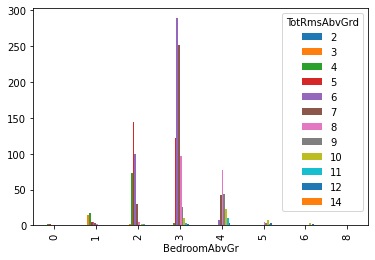

--------------------------------------------------
dof=77
[[4.10958904e-03 6.98630137e-02 3.98630137e-01 1.13013699e+00
  1.65205479e+00 1.35205479e+00 7.68493151e-01 3.08219178e-01
  1.93150685e-01 7.39726027e-02 4.52054795e-02 4.10958904e-03]
 [3.42465753e-02 5.82191781e-01 3.32191781e+00 9.41780822e+00
  1.37671233e+01 1.12671233e+01 6.40410959e+00 2.56849315e+00
  1.60958904e+00 6.16438356e-01 3.76712329e-01 3.42465753e-02]
 [2.45205479e-01 4.16849315e+00 2.37849315e+01 6.74315068e+01
  9.85726027e+01 8.06726027e+01 4.58534247e+01 1.83904110e+01
  1.15246575e+01 4.41369863e+00 2.69726027e+00 2.45205479e-01]
 [5.50684932e-01 9.36164384e+00 5.34164384e+01 1.51438356e+02
  2.21375342e+02 1.81175342e+02 1.02978082e+02 4.13013699e+01
  2.58821918e+01 9.91232877e+00 6.05753425e+00 5.50684932e-01]
 [1.45890411e-01 2.48013699e+00 1.41513699e+01 4.01198630e+01
  5.86479452e+01 4.79979452e+01 2.72815068e+01 1.09417808e+01
  6.85684932e+00 2.62602740e+00 1.60479452e+00 1.45890411e-01]
 [1.438

In [835]:
# Ho: Biến BedroomAbvGr và TotRmsAbvGrd là 2 biến độc lập.
# H1: Biến BedroomAbvGr và TotRmsAbvGrd không phải là 2 biến độc lập.
chisquared_test(df, 'BedroomAbvGr', 'TotRmsAbvGrd')

### Categorical & Continuous
- Có quan hệ giữa 'FullBath' và 'LotArea'? ('FullBath' có bị ảnh hưởng bởi'LotArea'?).
- Dùng biểu đồ boxplot của Seaborn để vẽ biểu đồ giữa 2 biến (x="FullBath", y="LotArea") 
- Dùng ANOVA one way.
- Dùng Tukey HSD nhận xét về mối quan hệ (nếu có).

In [836]:
# H0: FullBath và LotArea không có quan hệ.
# H1: FullBath và LotArea có quan hệ.

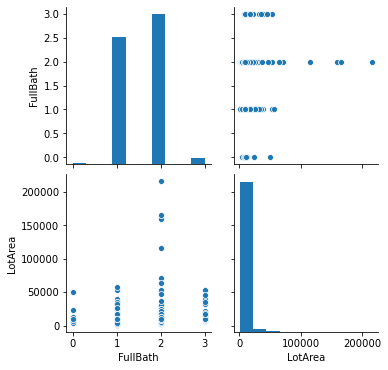

In [837]:
sns.pairplot(df, vars=['FullBath', 'LotArea'])

In [838]:
# Có quan hệ giữa 'FullBath' và 'LotArea'? ('FullBath' có bị ảnh hưởng bởi'LotArea'?).
from scipy.stats import ttest_ind, ttest_rel

t_stat, p = ttest_rel(df['FullBath'], df['LotArea'])
print(f't={t_stat}, p={p}')
alpha = 0.05
if p > alpha:
    print('Chấp nhận giả thuyết H0 rằng FullBath và LotArea không có quan hệ.')
    print('Kết luận: FullBath không bị ảnh hưởng bởi LotArea.')
else:
    print('Từ chối giả thuyết H0 rằng FullBath và LotArea không có quan hệ.')
    print('Kết luận: FullBath có bị ảnh hưởng bởi LotArea.')

t=-40.25445999860334, p=6.296304923335801e-239
Từ chối giả thuyết H0 rằng FullBath và LotArea không có quan hệ.
Kết luận: FullBath có bị ảnh hưởng bởi LotArea.


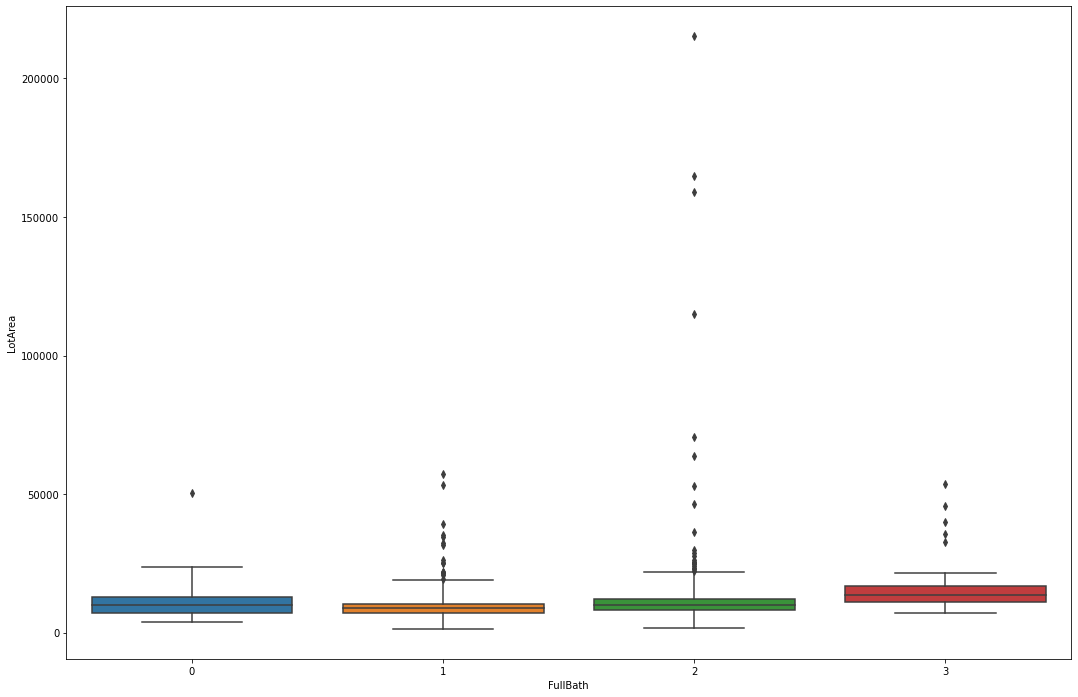

In [839]:
# Dùng biểu đồ boxplot của Seaborn để vẽ biểu đồ giữa 2 biến (x="FullBath", y="LotArea")
plt.figure(figsize=(18, 12))
sns.boxplot(x='FullBath', y='LotArea', data=df, whis=2.5)
plt.show()

In [840]:
# Dùng ANOVA one way.
# H0: Không có sự khác biệt giữa các trung bình của FullBath và LotArea.
# H1: Có sự khác biệt giữa các trung bình ở đâu đó của FullBath và LotArea.
fvalue, pvalue = stats.f_oneway(df['FullBath'], 
                                df['LotArea'])
print(f'fvalue: {fvalue}, pvalue: {pvalue}')
alpha = 0.05
if pvalue < 0.05:
    print('Từ chối giả thuyết H0 rằng không có sự khác biệt giữa các trung bình của FullBath và LotArea.')
else:
    print("Chấp nhận giả thuyết H0 rằng không có sự khác biệt giữa các trung bình của FullBath và LotArea.")

fvalue: 1620.3990056353841, pvalue: 3.3975376258008362e-282
Từ chối giả thuyết H0 rằng không có sự khác biệt giữa các trung bình của FullBath và LotArea.


#### Kết luận: Có sự khác biệt giữa các trung bình ở đâu đó của FullBath và LotArea.

In [841]:
# Dùng Tukey HSD nhận xét về mối quan hệ (nếu có).
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
d_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['FullBath', 'LotArea'])
d_melt.columns = ['index', 'full-bath-lot-area', 'values']
m_comp = pairwise_tukeyhsd(endog=d_melt['values'], groups=d_melt['full-bath-lot-area'], alpha=0.05)
print(m_comp)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
 group1   group2  meandiff p-adj   lower      upper    reject
-------------------------------------------------------------
FullBath LotArea 10515.263 0.001 10003.0655 11027.4605   True
-------------------------------------------------------------


#### Kết luận: Kiểm định thông qua Tukey HSD cho kết quả bác bỏ null hypothesis (H0), do đó có sự khác biệt đáng kể về mặt thống kê giữa dữ liệu FullBath và LotArea. Kích thước phòng tắm phụ thuộc vào diện tích khu đất.

## 4. Xử lý dữ liệu thiếu
- Kiểm tra xem có cột nào chứa dữ liệu null không

In [842]:
null_columns = df.columns[df.isnull().any()]
print('Columns that have null values: ', null_columns)
df[null_columns]

Columns that have null values:  Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,NaN,None,0.0,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,1999.0,RFn,TA,TA,NaN,NaN,NaN
1456,85.0,NaN,Stone,119.0,Gd,TA,No,ALQ,Rec,SBrkr,TA,Attchd,1978.0,Unf,TA,TA,NaN,MnPrv,NaN
1457,66.0,NaN,None,0.0,TA,Gd,No,GLQ,Unf,SBrkr,Gd,Attchd,1941.0,RFn,TA,TA,NaN,GdPrv,Shed
1458,68.0,NaN,None,0.0,TA,TA,Mn,GLQ,Rec,FuseA,NaN,Attchd,1950.0,Unf,TA,TA,NaN,NaN,NaN
